# Clustering Assignment

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
# importing main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing Hierarchical Clustering libraries 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
crime = pd.read_csv("D:/Clustering/crime_data.csv")

In [4]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Clustering:Hierarchical

In [5]:
#Normlazation fuction use sklearn library norm
def norm_func(i):
  crime = (i-i.min())/(i.max()-i.min())
  return (crime)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [7]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [8]:
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


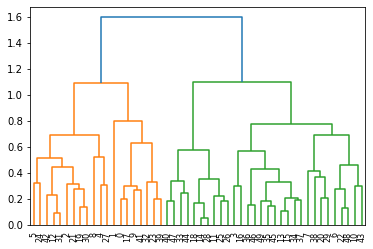

In [9]:
# Create Dendrogram
dendrogram =sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [10]:
# Create Cluster
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [11]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

The Number of cluster ar

In [12]:
#Save cluster for chart
y_hc = hc.fit_predict(df_norm)

In [13]:
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [14]:
crime['h_clusterid'] = y_hc

In [15]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [16]:
crime1=crime.sort_values("h_clusterid")
crime1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


### Here, in the above cell how many clusterid are mentioned in front of the different places of the united state.

# Clustering: K-Means

In [17]:
# Importing K-means libraries

from sklearn.cluster import KMeans

In [18]:
# standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [19]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.61867696],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.4889334 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.1218359 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.99209233],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.1218359 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.1218359 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.99209233],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.99209233],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.1218359 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.61867696],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.99209233],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.74842053],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.1218359 ],
       [-0.13637203, -0.70012057, -0.0

### How to find optimum number of cluster
### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-square criterion:


In [20]:
kmeans =KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_crime_df)

In [21]:
predict

array([2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3, 1,
       3, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 3, 3])

In [22]:
kmeans.inertia_

61.85088338209116

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
wcss

[250.0,
 142.2356915237204,
 98.66687275954955,
 61.85088338209116,
 52.89688590712987,
 45.815951116623744,
 42.60864950560209,
 37.00072335386269,
 34.68240696824383,
 30.75179465133982]

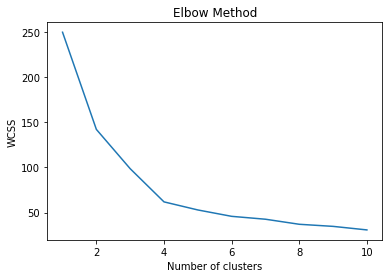

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [27]:
dir(clusters_new)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

In [28]:
clusters_new.labels_

array([2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0])

In [29]:
# Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_


In [30]:
# These are standardized values.
clusters_new.cluster_centers_

array([[-0.48078097, -0.46618139,  0.36708043, -0.33778218, -0.99209233],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715, -0.1218359 ],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393,  1.72745902],
       [-1.0687114 , -1.11587777, -1.13334338, -1.03556337,  0.74842053]])

In [31]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\Vaibhav Kinge\AppData\Local\Temp\ipykernel_8596\1392695126.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.715000,132.300000,70.800000,18.1000,0.000
1,1,10.883333,256.916667,78.333333,32.2500,1.000
2,2,14.087500,252.750000,53.500000,24.5375,3.125
3,3,3.180000,78.700000,49.300000,11.6300,2.000


In [32]:
crime[crime['clusterid_new']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,Idaho,2.6,120,54,14.2,2,3
14,Iowa,2.2,56,57,11.3,2,3
18,Maine,2.1,83,51,7.8,2,3
25,Montana,6.0,109,53,16.4,2,3
26,Nebraska,4.3,102,62,16.5,2,3
28,New Hampshire,2.1,57,56,9.5,2,3
33,North Dakota,0.8,45,44,7.3,2,3
40,South Dakota,3.8,86,45,12.8,2,3
44,Vermont,2.2,48,32,11.2,2,3
47,West Virginia,5.7,81,39,9.3,2,3


In [33]:
crime[crime['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
3,Arkansas,8.8,190,50,19.5,0,0
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
10,Hawaii,5.3,46,83,20.2,0,0
13,Indiana,7.2,113,65,21.0,0,0
15,Kansas,6.0,115,66,18.0,0,0
16,Kentucky,9.7,109,52,16.3,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
22,Minnesota,2.7,72,66,14.9,0,0
29,New Jersey,7.4,159,89,18.8,0,0


#### New clusterid are zero.

# Clustering: DBScan

### Overview
#### DBSCAN clustering is an underrated yet super useful clustering algorithm for unsupervised learning problems

In [34]:
#Import the libraries
import sklearn.utils

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [35]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1


In [36]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   h_clusterid    50 non-null     int64  
 6   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB
None


In [37]:
crime = crime[['Murder','Rape']]
crime = np.nan_to_num(crime)
crime = np.array(crime,dtype=np.float64)
crime = StandardScaler().fit_transform(crime)

In [59]:
#Compute DBScan
db = DBSCAN(eps=0.5,min_samples=5).fit(crime)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of cluster in labels, ignoring noise if present.
realClusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum = len(set(labels))
n_noise_ = list(labels).count(-1)

In [62]:
# A Sample of cluster
print("Estimated number of cluster: %d" % realClusterNum)
print("Estimated number of clusterNum: %d" % clusterNum)
print("Estimated number of n_noise: %d" % n_noise_)

Estimated number of cluster: 2
Estimated number of clusterNum: 3
Estimated number of n_noise: 17


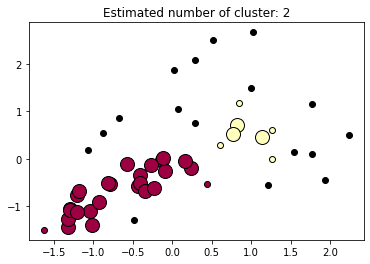

In [65]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = crime[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = crime[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of cluster: %d" % realClusterNum)
plt.show()

### The above plot shows cluster number is 2.